<a href="https://colab.research.google.com/github/aswathim3844/paatshala-assessment/blob/main/Copy_of_casestudy_on_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing neccesary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder ,MinMaxScaler ,LabelEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats.mstats  import winsorize
from sklearn.preprocessing import FunctionTransformer


In [2]:
#loading data

adult_data = pd.read_csv("/content/adult_dataset.csv")

In [3]:
adult_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40.0,United-States,>50K


In [4]:
adult_data.shape

(48842, 15)

In [5]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46400.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,46400.000000
mean,38.679116,1.896641e+05,10.078089,1079.067626,87.502314,40.448599
std,13.952954,1.056040e+05,2.570973,7452.019058,403.004552,12.646992
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.490400e+06,16.000000,99999.000000,4356.000000,250.000000


In [6]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB


###EDA

In [7]:
numerical = adult_data.select_dtypes(('float64','int64'))
categorical = adult_data.select_dtypes('object')

In [8]:
# for i in numerical:
#   plt.figure(figsize=(10,5))
#   sns.histplot(data=adult_data,x=i,kde=True)



In [9]:
# for i in numerical:
#   plt.figure(figsize=(10,5))
#   sns.boxplot(data=adult_data,x=i)

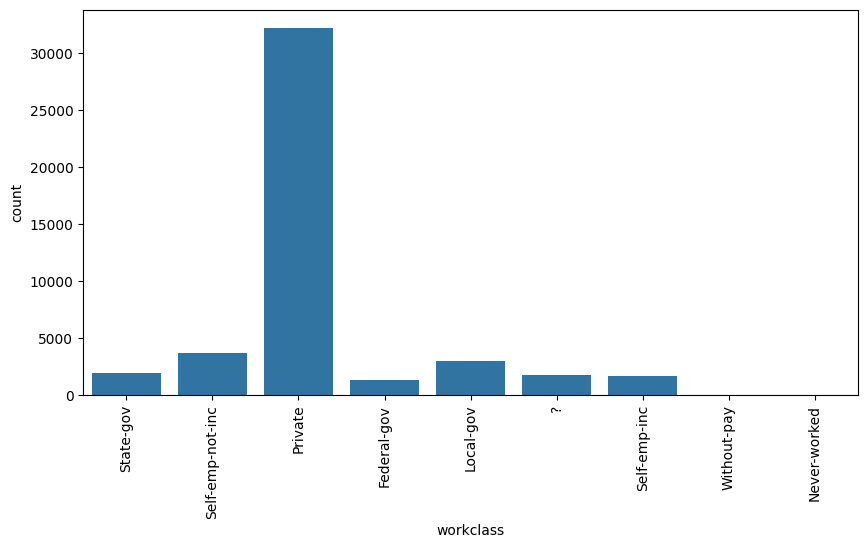

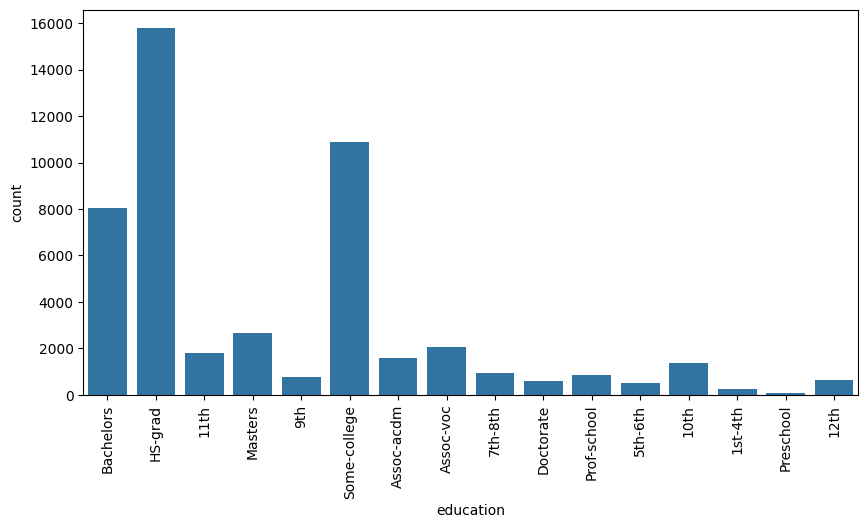

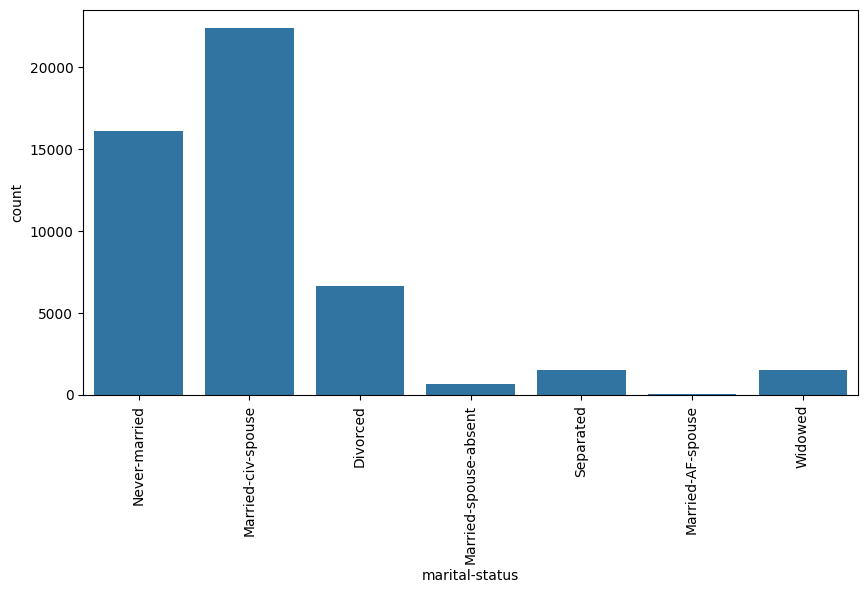

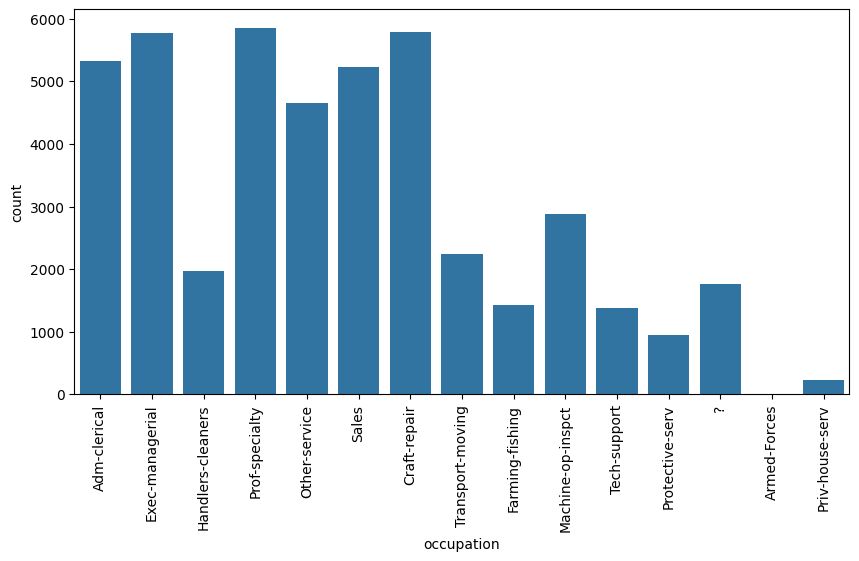

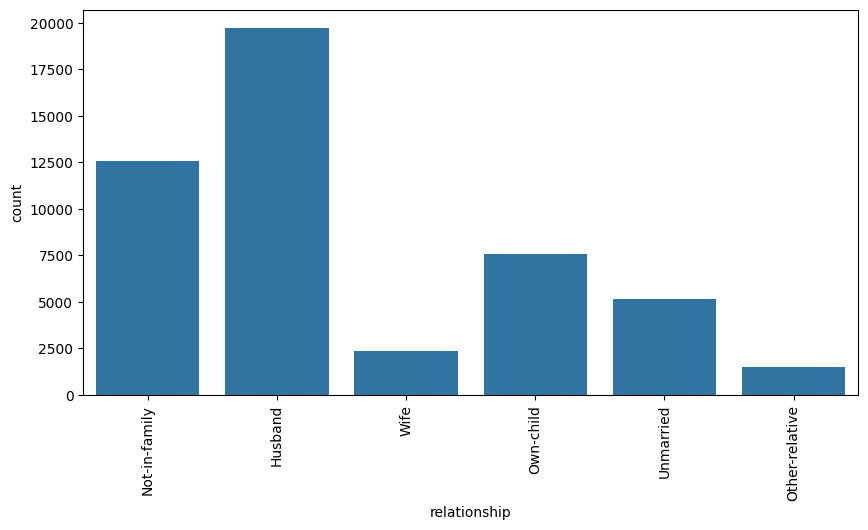

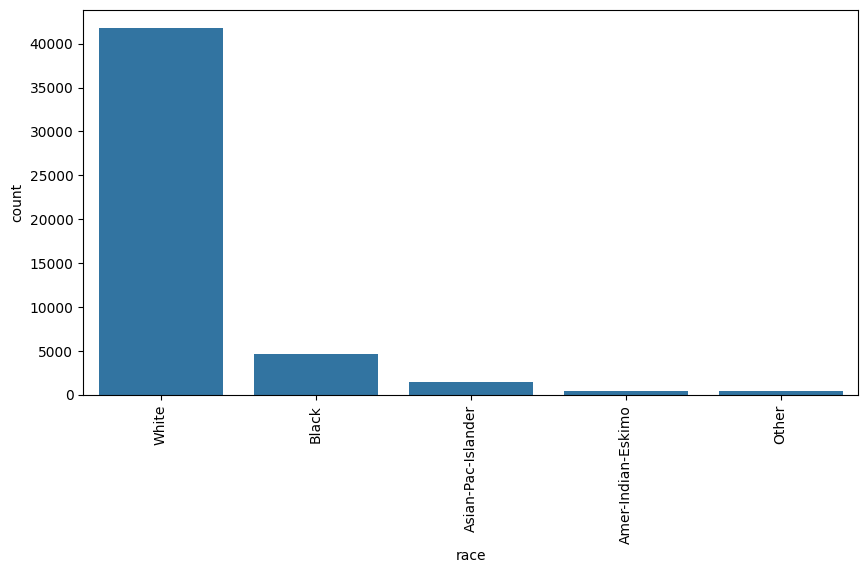

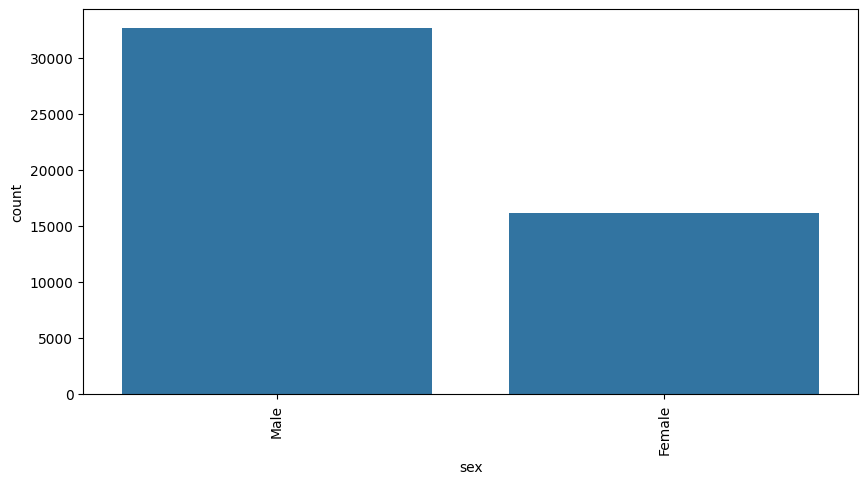

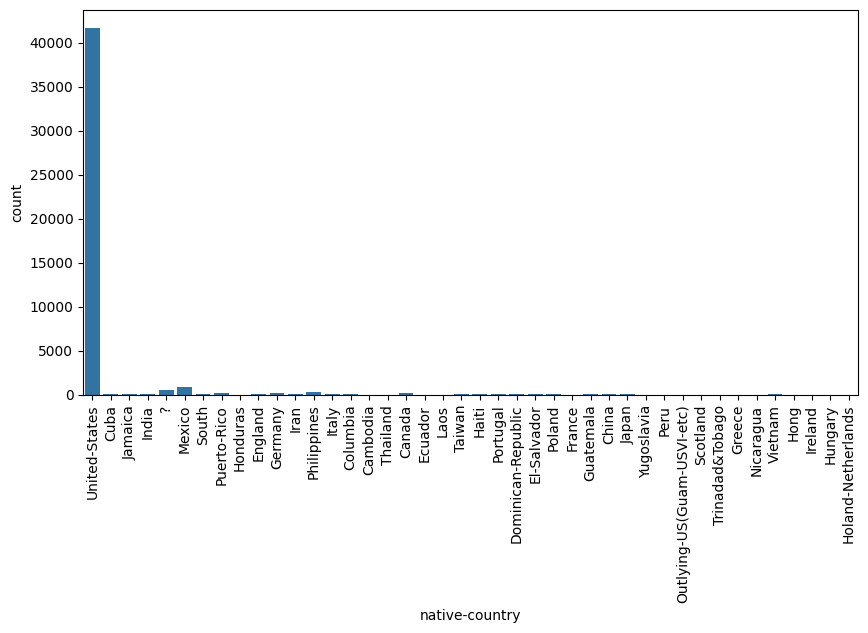

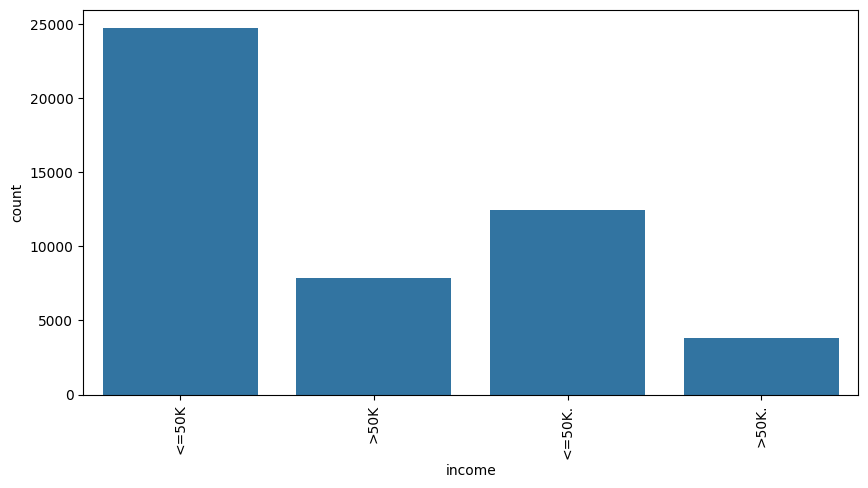

In [10]:
for i in categorical:
   plt.figure(figsize=(10,5))
   sns.countplot(data=adult_data,x=i)
   plt.xticks(rotation=90)


###DATA PREPROCESSING

In [11]:
adult_data = adult_data.drop(['fnlwgt','education','capital-gain',	'capital-loss','income'],axis=1)

In [12]:
adult_data

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39.0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40.0,NaN
1,50.0,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13.0,United-States
2,38.0,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40.0,United-States
3,53.0,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40.0,United-States
4,28.0,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,36.0,United-States
48838,64.0,NaN,9,Widowed,NaN,Other-relative,Black,Male,40.0,United-States
48839,38.0,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50.0,United-States
48840,44.0,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40.0,United-States


In [13]:
adult_data.isna().sum()

,0
age,2442
workclass,3362
education-num,0
marital-status,0
occupation,3357
relationship,0
race,0
sex,0
hours-per-week,2442
native-country,2705


In [14]:
# Replace '?' with NaN in relevant categorical columns
categorical_cols_with_question_mark = ['workclass','occupation','native-country']
for col in categorical_cols_with_question_mark:
    if col in adult_data.columns:
        adult_data[col] = adult_data[col].replace('?', np.nan)

# Verify the replacement (optional)
# print(adult_data[categorical_cols_with_question_mark].isna().sum())

In [15]:
adult_data.isna().sum()

,0
age,2442
workclass,5125
education-num,0
marital-status,0
occupation,5115
relationship,0
race,0
sex,0
hours-per-week,2442
native-country,3260


In [16]:
#handling missing values


median_vals=['age','hours-per-week']
mode_vals =['workclass','occupation','native-country']
for col in median_vals:
    adult_data[col].fillna(adult_data[col].median(), inplace=True)

for col in mode_vals:
    adult_data[col].fillna(adult_data[col].mode()[0], inplace=True)

/tmp/ipython-input-345211070.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult_data[col].fillna(adult_data[col].median(), inplace=True)
/tmp/ipython-input-345211070.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [17]:
# handling outliers

winsor_limits = {
      'age': (0.00, 0.3487),
      'hours-per-week': (0.00, 0.40),}

for col, (lower_limit, upper_limit) in winsor_limits.items():
    adult_data[col] = winsorize(adult_data[col], limits=(lower_limit, upper_limit))

In [18]:
#scaling

robust_cols = ['age', 'hours-per-week']
scaler = RobustScaler()
adult_data[robust_cols] = scaler.fit_transform(adult_data[robust_cols])

In [71]:
#encoding

def frequency_encode_multiple(df, columns):
    df = df.copy()
    for col in columns:
        freq_map = df[col].value_counts(normalize=True).to_dict()
        df[col] = df[col].map(freq_map).fillna(0)
    return df

In [72]:
freq_col =[   'race'  ,'sex','workclass','marital-status'     ,'occupation' , 'relationship' ,'native-country']
adult_data_freq_encoded = frequency_encode_multiple(adult_data, freq_col)

In [73]:
adult_data_freq_encoded

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,0.142857,0.038430,13,0.329982,0.109107,0.257627,0.855043,0.668482,0.0,0.918922
1,0.357143,0.074710,13,0.458192,0.118157,0.403669,0.855043,0.668482,-27.0,0.918922
2,0.071429,0.764608,9,0.135805,0.040477,0.257627,0.855043,0.668482,0.0,0.918922
3,0.357143,0.764608,7,0.458192,0.040477,0.403669,0.095922,0.668482,0.0,0.918922
4,-0.642857,0.764608,13,0.458192,0.224581,0.047725,0.095922,0.331518,0.0,0.002703
...,...,...,...,...,...,...,...,...,...,...
48837,0.142857,0.764608,13,0.135805,0.224581,0.257627,0.855043,0.331518,-4.0,0.918922
48838,0.357143,0.764608,9,0.031080,0.224581,0.030834,0.095922,0.668482,0.0,0.918922
48839,0.071429,0.764608,13,0.458192,0.224581,0.403669,0.855043,0.668482,0.0,0.918922
48840,0.357143,0.764608,13,0.135805,0.109107,0.155215,0.031100,0.668482,0.0,0.918922


In [49]:
adult_data_freq_encoded.shape

(48842, 10)

In [50]:
#fitting to kmean

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(adult_data_freq_encoded)
    wcss.append(kmeans.inertia_)

wcss


[807380.0875556953,
 554523.9486178115,
 381873.0735153309,
 278091.1082074407,
 243884.98562542727,
 179885.62249491323,
 158652.44575704733,
 147947.46086701113,
 139125.95978212243]

Text(0.5, 0, 'number of clusters')

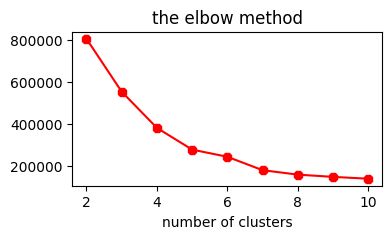

In [51]:
plt.figure(figsize=(4,2))
plt.plot(range(2,11),wcss,color='red',marker='8')
plt.title('the elbow method')
plt.xlabel('number of clusters')

In [52]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(adult_data_freq_encoded)
adult_data_freq_encoded['cluster'] = kmeans.predict(adult_data_freq_encoded)
adult_data_freq_encoded.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,cluster
0,0.142857,0.038430,13,0.329982,0.109107,0.257627,0.855043,0.668482,0.0,0.918922,3
1,0.357143,0.074710,13,0.458192,0.118157,0.403669,0.855043,0.668482,-27.0,0.918922,2
2,0.071429,0.764608,9,0.135805,0.040477,0.257627,0.855043,0.668482,0.0,0.918922,0
3,0.357143,0.764608,7,0.458192,0.040477,0.403669,0.095922,0.668482,0.0,0.918922,0
4,-0.642857,0.764608,13,0.458192,0.224581,0.047725,0.095922,0.331518,0.0,0.002703,3


In [53]:
kmeans.labels_

array([3, 2, 0, ..., 3, 3, 3], dtype=int32)

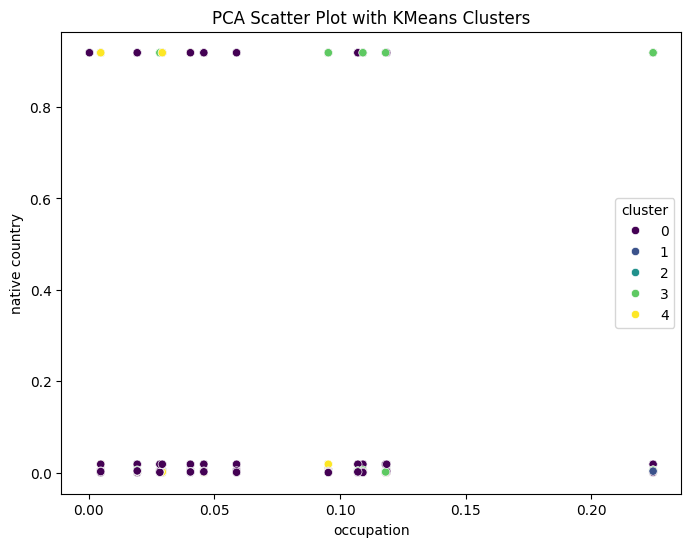

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=adult_data_freq_encoded['occupation'], y=adult_data_freq_encoded['native-country'], hue=adult_data_freq_encoded['cluster'], palette='viridis', legend='full')
plt.title('PCA Scatter Plot with KMeans Clusters')
plt.xlabel('occupation')
plt.ylabel('native country')
plt.show()

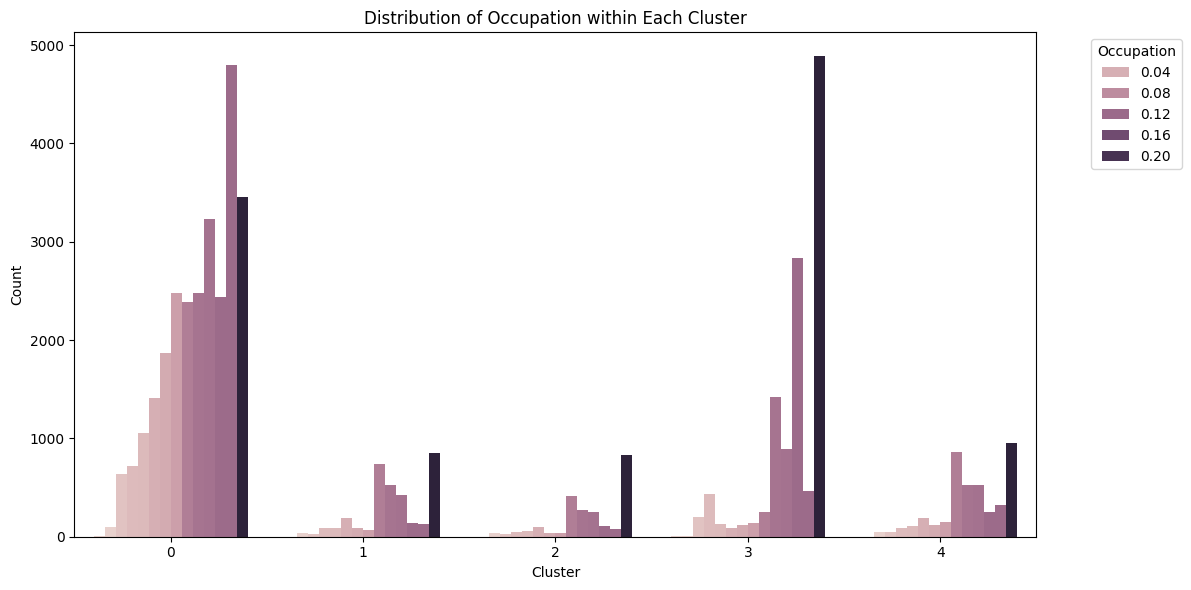

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(data=adult_data_freq_encoded, x='cluster', hue='occupation')
plt.title('Distribution of Occupation within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [58]:
# Analyze the characteristics of each cluster
cluster_characteristics = adult_data_freq_encoded.groupby('cluster').agg({
    'age': 'mean',
    'workclass': lambda x: x.mode()[0],
    'education-num': 'mean',
    'marital-status': lambda x: x.mode()[0],
    'occupation': lambda x: x.mode()[0],
    'relationship': lambda x: x.mode()[0],
    'race': lambda x: x.mode()[0],
    'sex': lambda x: x.mode()[0],
    'hours-per-week': 'mean',
    'native-country': lambda x: x.mode()[0]
})

display(cluster_characteristics)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
cluster,,,,,,,,,,
0,-0.147923,0.764608,8.854057,0.458192,0.118566,0.403669,0.855043,0.668482,-0.061803,0.918922
1,-0.515105,0.764608,9.500000,0.329982,0.224581,0.155215,0.855043,0.331518,-18.164706,0.918922
2,-0.435521,0.764608,9.416667,0.329982,0.224581,0.155215,0.855043,0.331518,-28.848604,0.918922
3,-0.025934,0.764608,13.353045,0.458192,0.224581,0.403669,0.855043,0.668482,-0.133940,0.918922
4,-0.351146,0.764608,9.543525,0.329982,0.224581,0.257627,0.855043,0.331518,-7.465061,0.918922


In [62]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5,random_state=42)
labels=kmeans.fit_predict(adult_data_freq_encoded)

score = silhouette_score(adult_data_freq_encoded,labels)
print('silhouette score :',score)

silhouette score : 0.6074576237193712


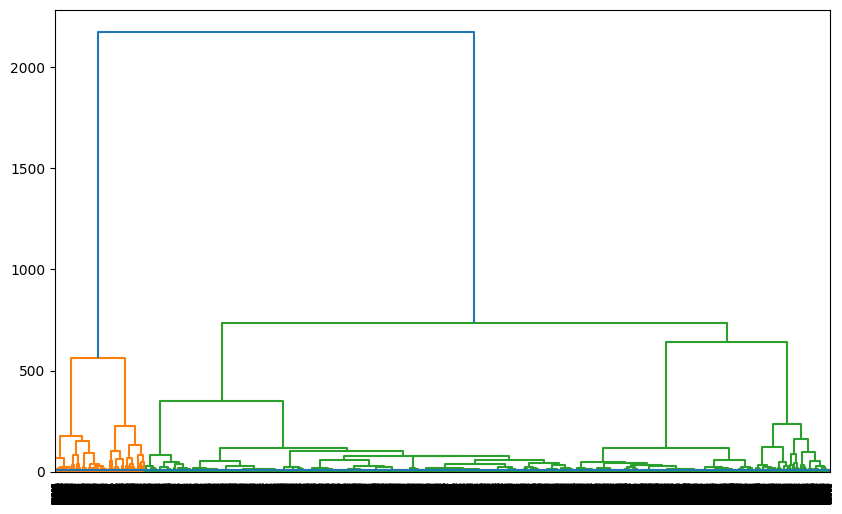

In [63]:
from scipy.cluster.hierarchy import dendrogram,linkage
mergings = linkage(adult_data_freq_encoded,method = 'ward')

plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(8)
plt.show()


In [74]:
#fittting to AgglomerativeClustering


from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
new_cluster_labels = agg_hc.fit_predict(adult_data_freq_encoded)

In [70]:
score = silhouette_score(adult_data_freq_encoded,new_cluster_labels)
print('silhouette score :', score)

silhouette score : 0.6009109980276693
